In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
#데이터 불러오기
df = pd.read_csv("C:/Ai/DL/diabetes.csv", index_col=0)
df_new = df.drop('Outcome', axis =1)
df_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30


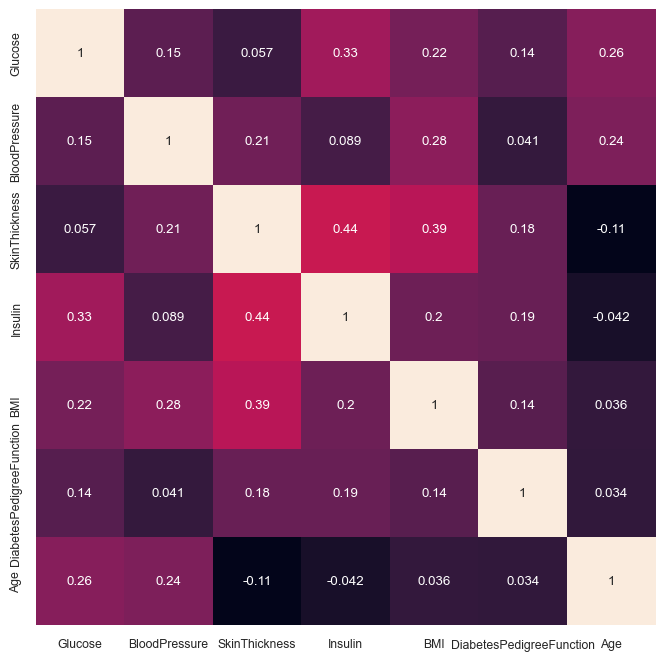

In [3]:

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df_new.corr()

#히트맵
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [4]:
X = df_new.drop('BMI', axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,
6,148,72,35,0,0.627,50
1,85,66,29,0,0.351,31
8,183,64,0,0,0.672,32
1,89,66,23,94,0.167,21
0,137,40,35,168,2.288,33


In [5]:
y = df_new['BMI']
y.head()

Pregnancies
6    33.6
1    26.6
8    23.3
1    28.1
0    43.1
Name: BMI, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)              
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 6) (614,)
(154, 6) (154,)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 50.97695632055756
평균제곱근오차 50.97695632055756
평균제곱근오차 50.976956320557555


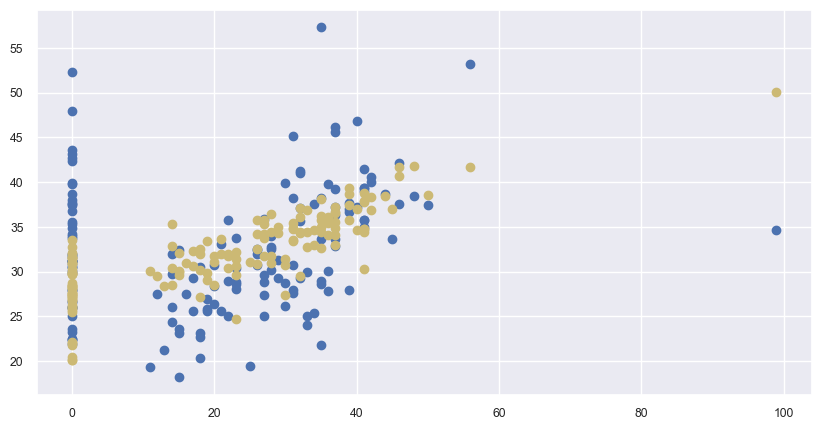

In [8]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()    

In [9]:

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 105.22480519480519


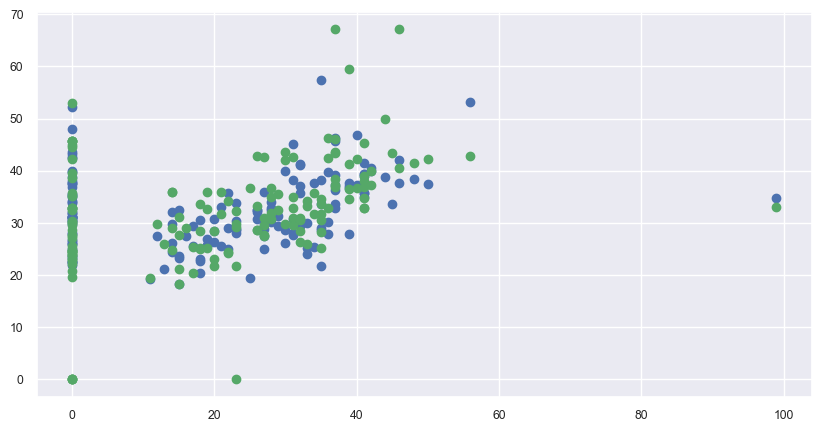

In [10]:

plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], dy_preds, c='g', label='dy_preds')
plt.show()         

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 47.11227020129873


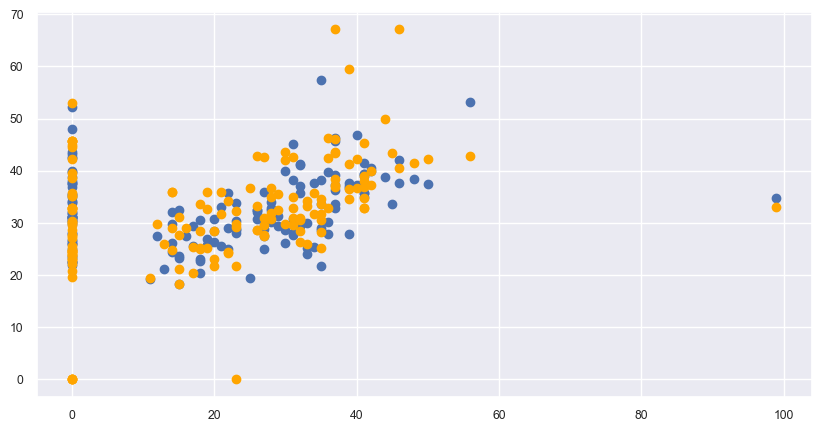

In [12]:

plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], dy_preds, c='orange', label='ry_preds')
plt.show()         

In [13]:

from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 49.352521437309235


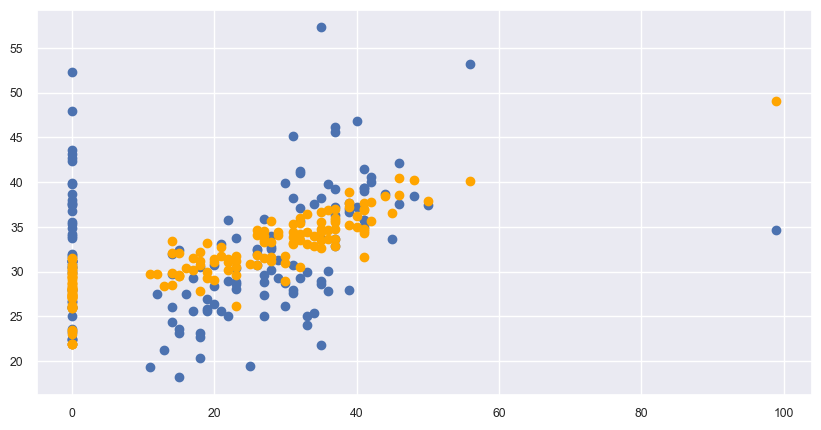

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange', label='ry_preds')

plt.show()    